<a href="https://colab.research.google.com/github/MohammedTanveergithub/Fraud-app/blob/main/ENG20CS0205_Mohammed_Tanveer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : Mohammed Tanveer,
USN : ENG20CS0205,
DATA SCIENCE PROJECT 

IMPORTING ALL REQUIRED LIBRARIES 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

LOADING THE DATASET

In [ ]:
# Load dataset from CSV file
df = pd.read_csv('/content/AppleStore.csv')

DESCRIPTION ABOUT THE DATA AND UNDERSTANDING THE DATA

In [ ]:
df.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1  
3               37                5         9        1  
4               37                5        45        1

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [ ]:
df.describe()

Unnamed: 0            id    size_bytes        price  \
count   7197.000000  7.197000e+03  7.197000e+03  7197.000000   
mean    4759.069612  8.631310e+08  1.991345e+08     1.726218   
std     3093.625213  2.712368e+08  3.592069e+08     5.833006   
min        1.000000  2.816565e+08  5.898240e+05     0.000000   
25%     2090.000000  6.000937e+08  4.692275e+07     0.000000   
50%     4380.000000  9.781482e+08  9.715302e+07     0.000000   
75%     7223.000000  1.082310e+09  1.819249e+08     1.990000   
max    11097.000000  1.188376e+09  4.025970e+09   299.990000   

       rating_count_tot  rating_count_ver  user_rating  user_rating_ver  \
count      7.197000e+03       7197.000000  7197.000000      7197.000000   
mean       1.289291e+04        460.373906     3.526956         3.253578   
std        7.573941e+04       3920.455183     1.517948         1.809363   
min        0.000000e+00          0.000000     0.000000         0.000000   
25%        2.800000e+01          1.000000     3.500000         2.500000   
50%        3.000000e+02         23.000000     4.000000         4.000000   
75%        2.793000e+03        140.000000     4.500000         4.500000   
max        2.974676e+06     177050.000000     5.000000         5.000000   

       sup_devices.num  ipadSc_urls.num     lang.num      vpp_lic  
count      7197.000000      7197.000000  7197.000000  7197.000000  
mean         37.361817         3.707100     5.434903     0.993053  
std           3.737715         1.986005     7.919593     0.083066  
min           9.000000         0.000000     0.000000     0.000000  
25%          37.000000         3.000000     1.000000     1.000000  
50%          37.000000         5.000000     1.000000     1.000000  
75%          38.000000         5.000000     8.000000     1.000000  
max          47.000000         5.000000    75.000000     1.000000

In [ ]:
df.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

APPLYING DIFFERENT DATA VISUALIZATION TECHNIQUES ON THE DATASET TO FIND OUT THE HIDDEN PATTERS AND TO GET BETTER UNDERSTANDING OF THE DATA.

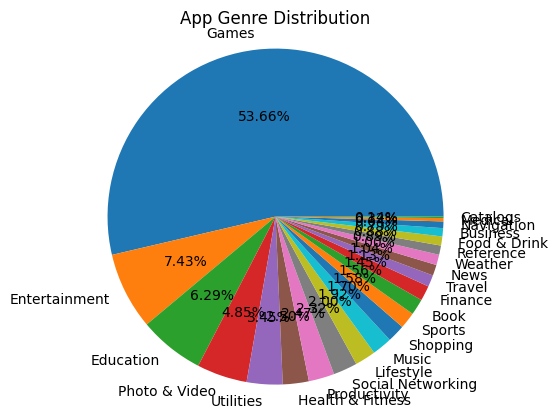

In [ ]:
# Count the number of apps in each genre
genre_counts = df['prime_genre'].value_counts()

# Create a pie chart of the genre distribution
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%.2f%%')
plt.axis('equal')
plt.title('App Genre Distribution')
plt.show()

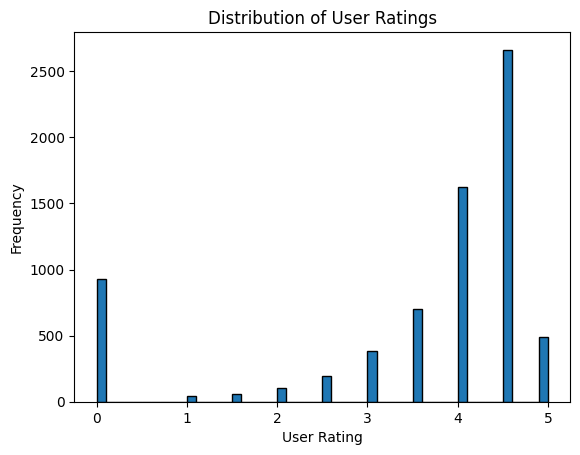

In [ ]:
# plot a histogram of the user ratings
plt.hist(df['user_rating'], bins=50, edgecolor='black')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

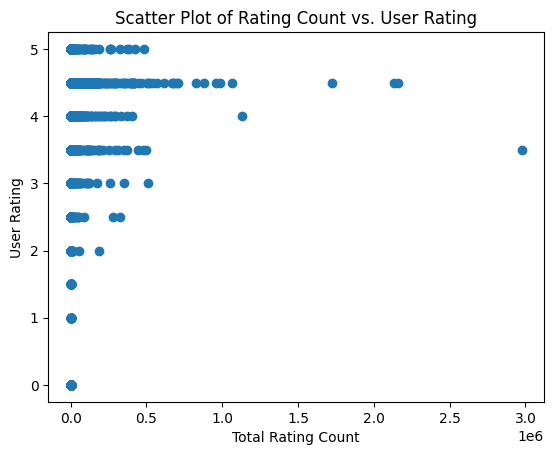

In [ ]:
# create a scatter plot of the rating_count_tot and user_rating columns
plt.scatter(df['rating_count_tot'], df['user_rating'])
plt.xlabel('Total Rating Count')
plt.ylabel('User Rating')
plt.title('Scatter Plot of Rating Count vs. User Rating')
plt.show()

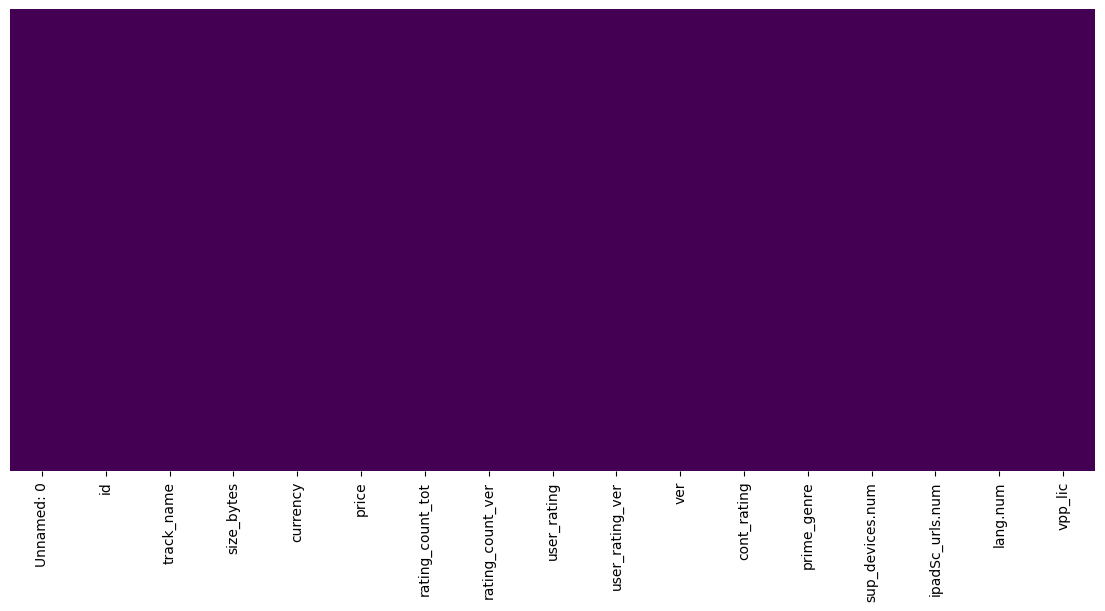

In [ ]:
plt.rcParams['figure.figsize'] = (14, 6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

CHECKING OUT FOR OUTLIERS

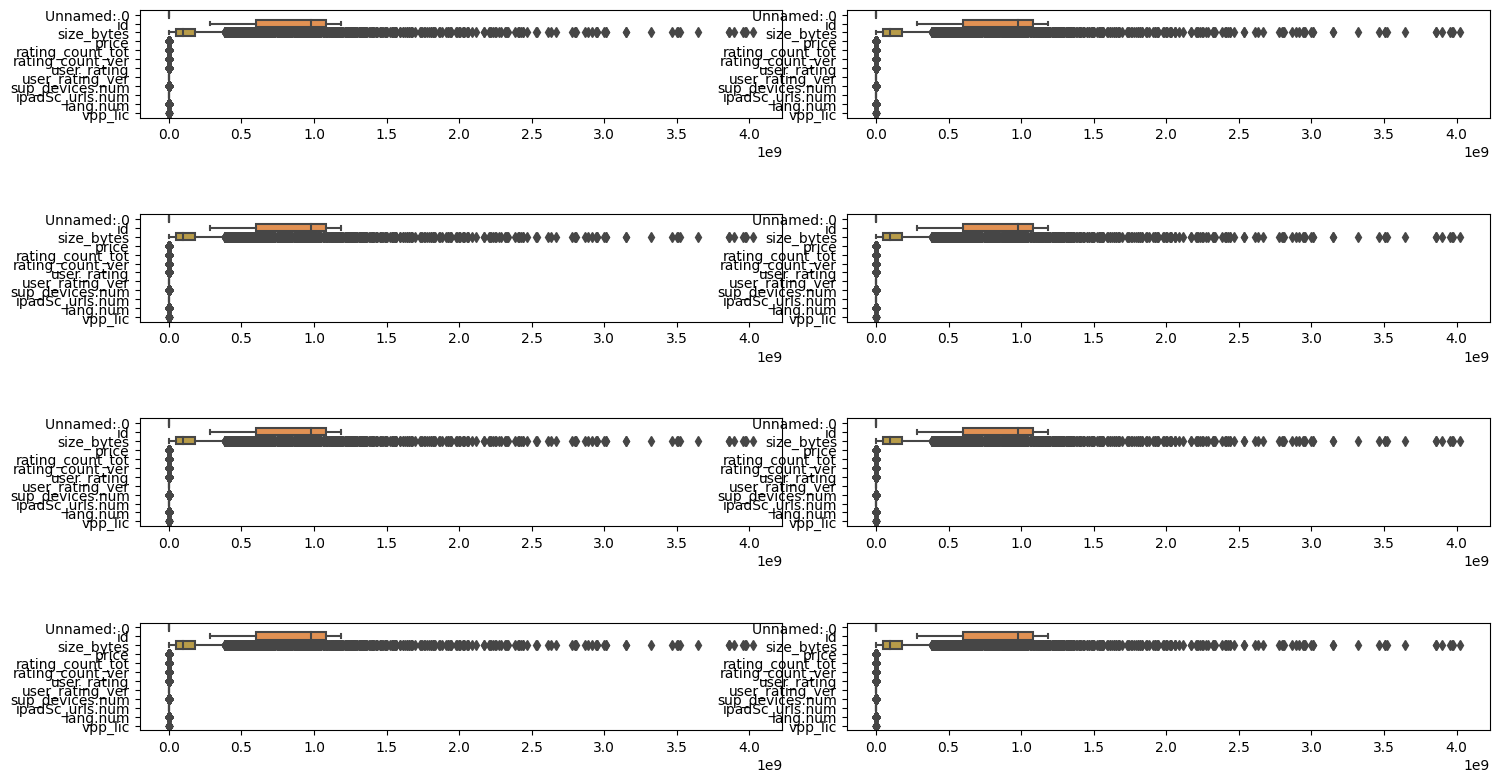

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
for i in range(8):
 plt.subplot(4,2,i+1)
 sns.boxplot(data=df, orient='h')
 plt.subplots_adjust(left=0.1,
 bottom=0.1,
right=1,
top=1,
wspace=0.1,
hspace=0.9)
plt.show()

USING DISTPLOT

<ipython-input-15-f737e7b22c7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating_count_tot'])


<Axes: xlabel='rating_count_tot', ylabel='Density'>

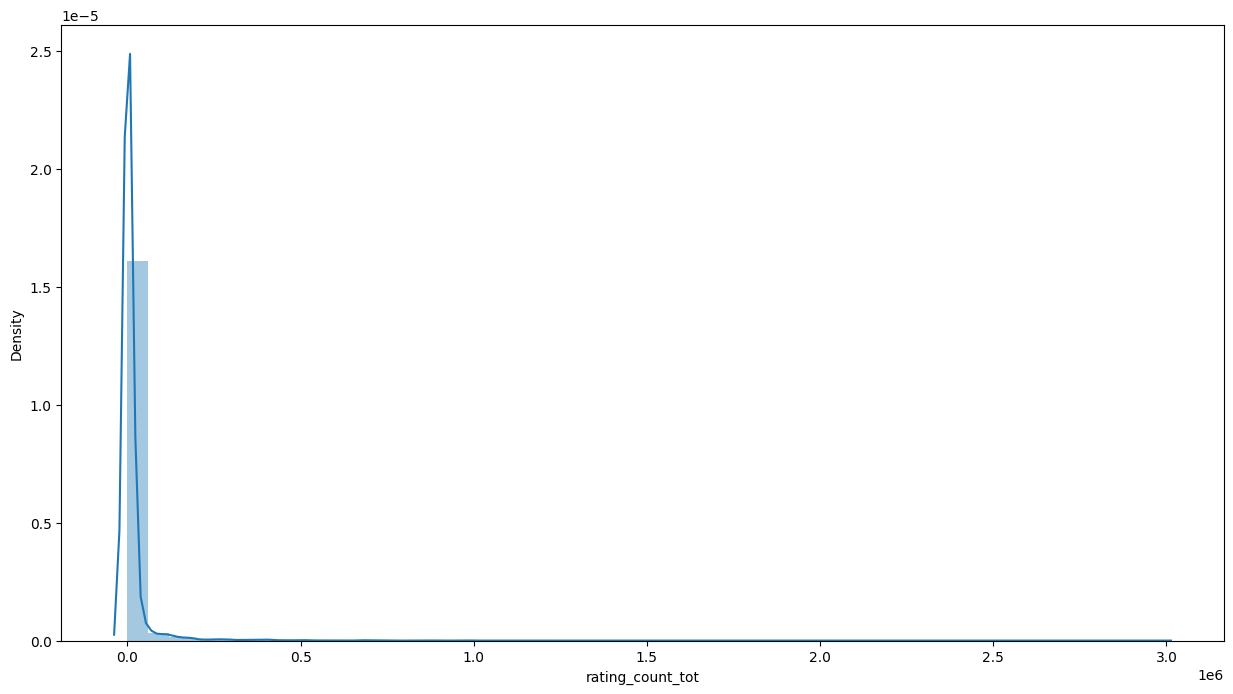

In [ ]:
sns.distplot(df['rating_count_tot'])

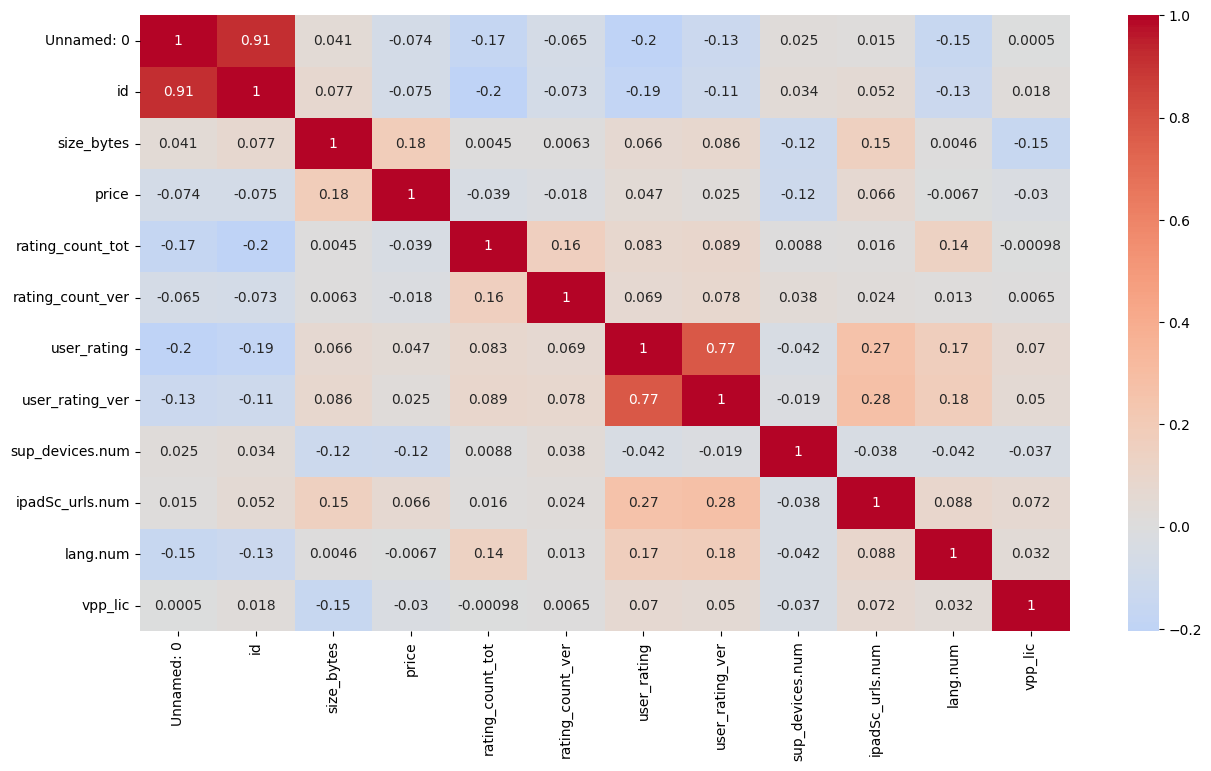

In [ ]:
# HEAT MAP
# Get the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Compute correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

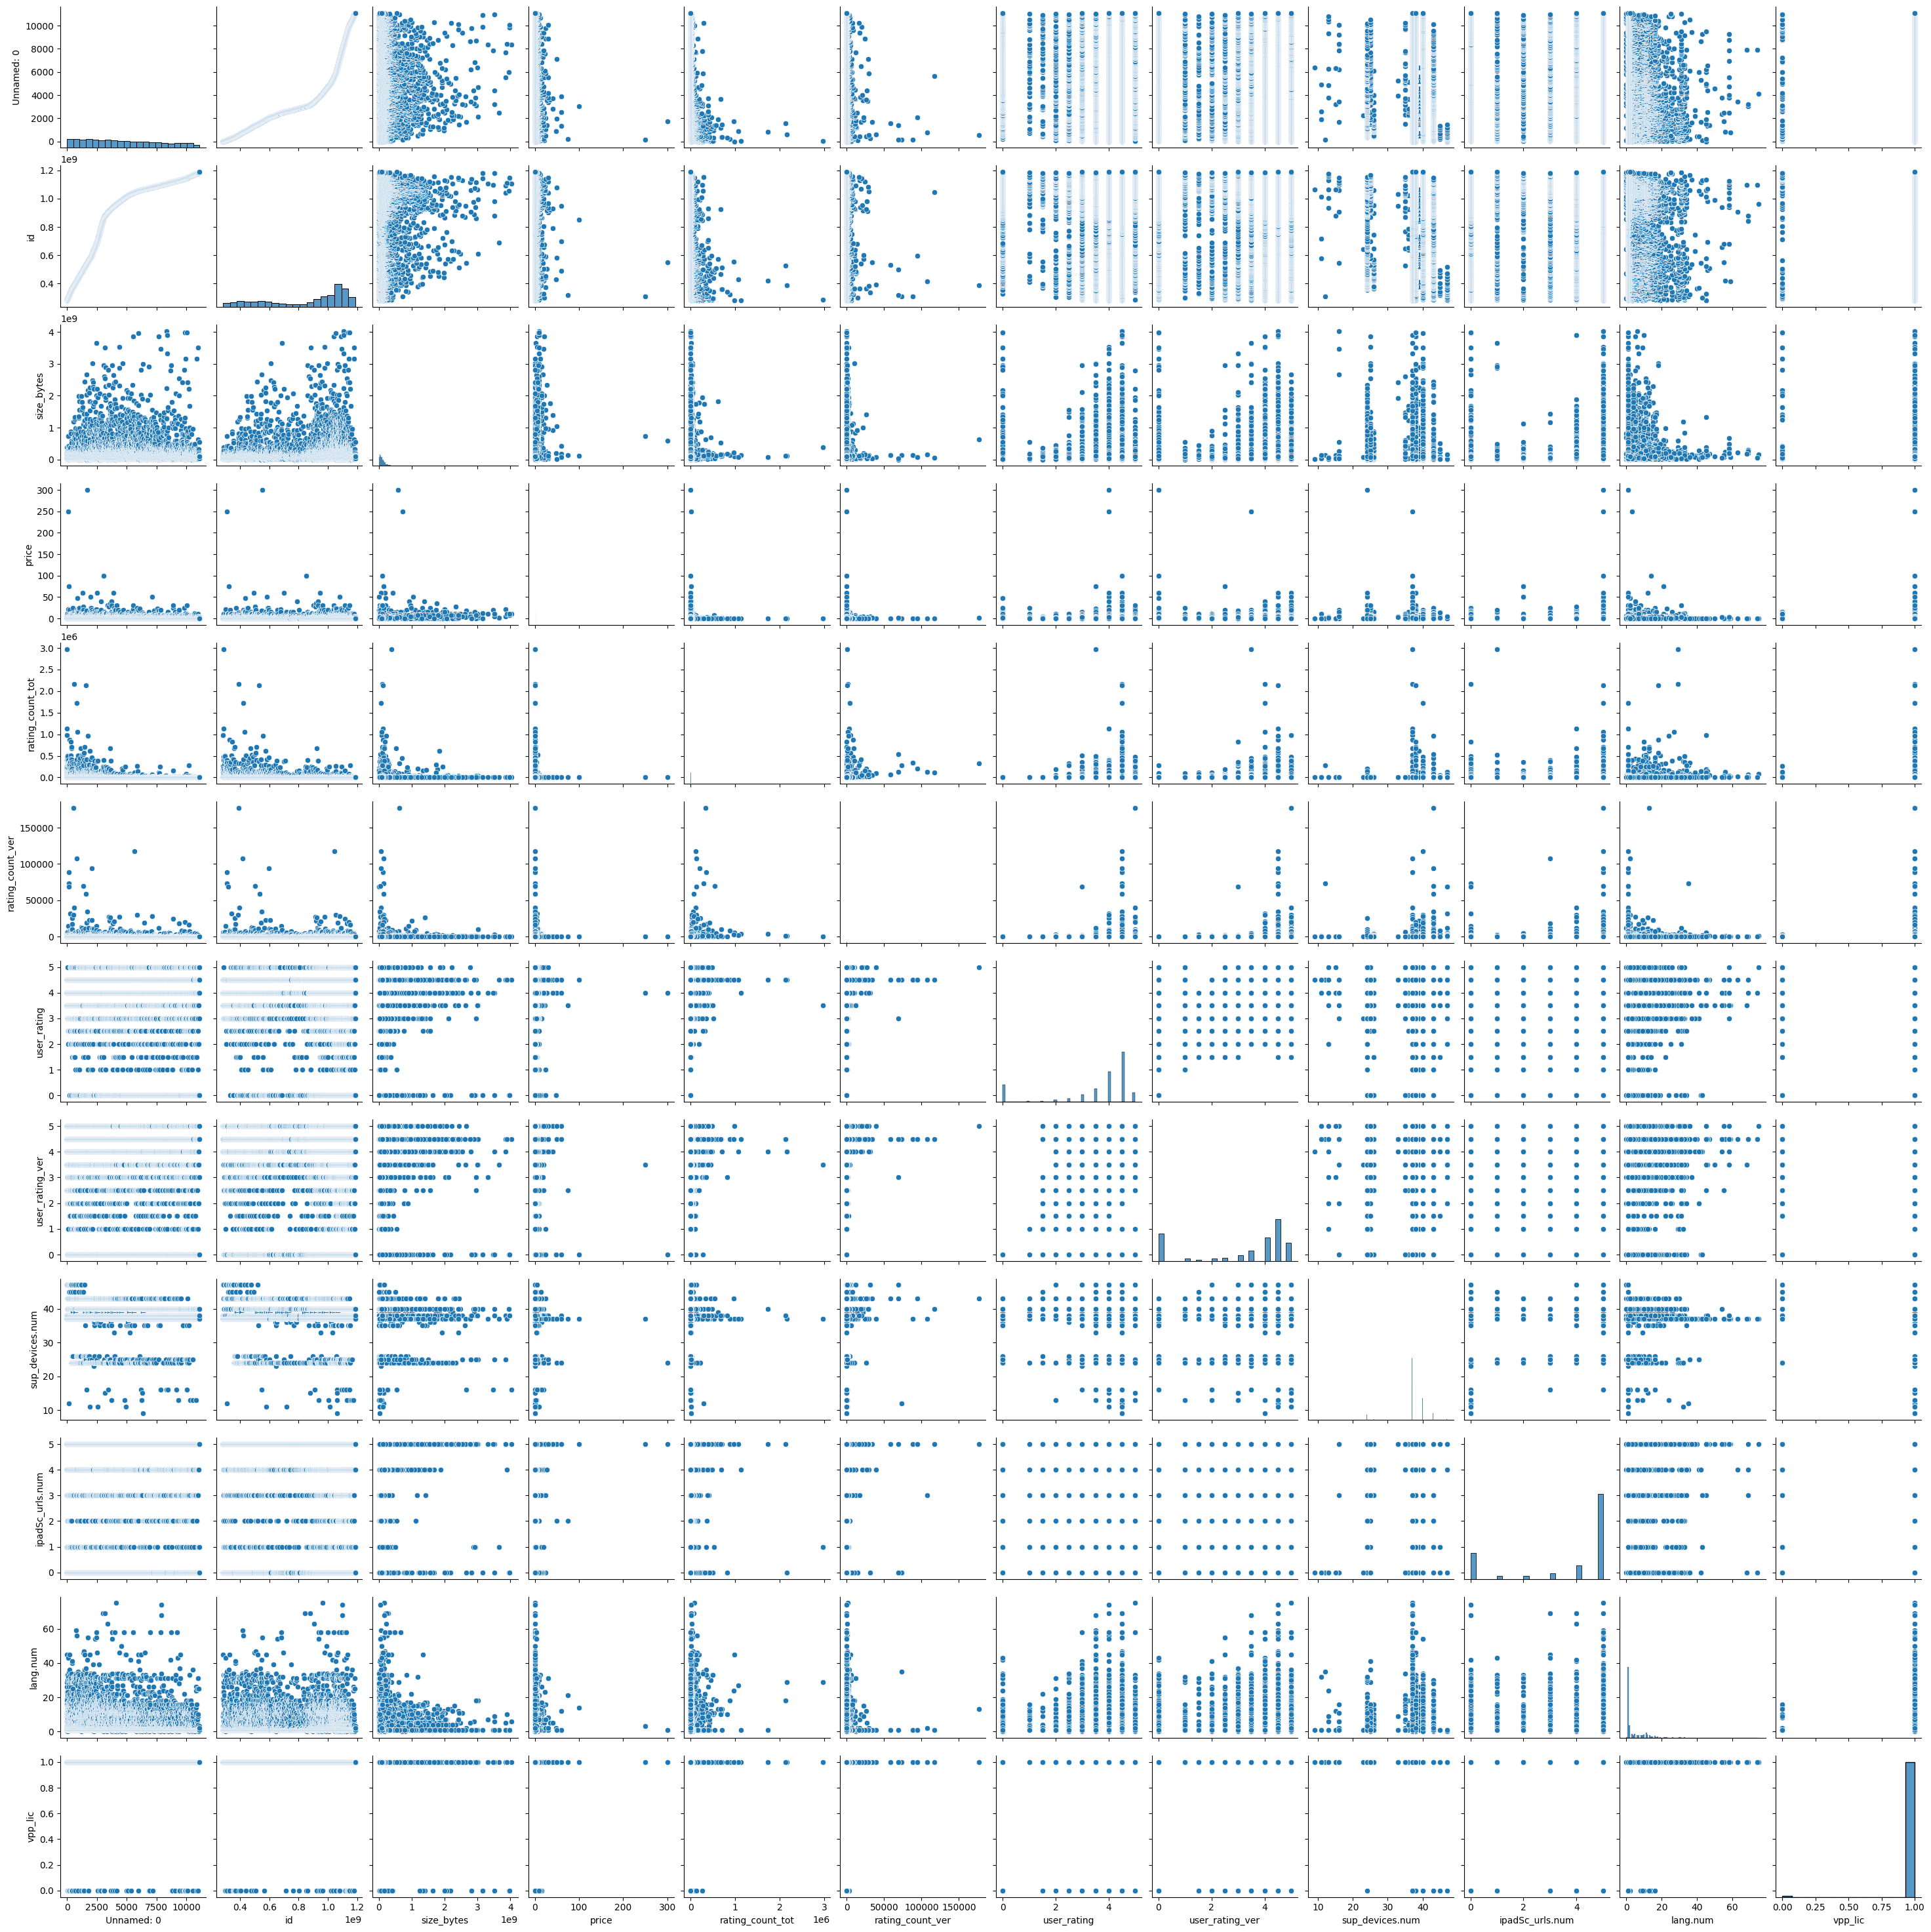

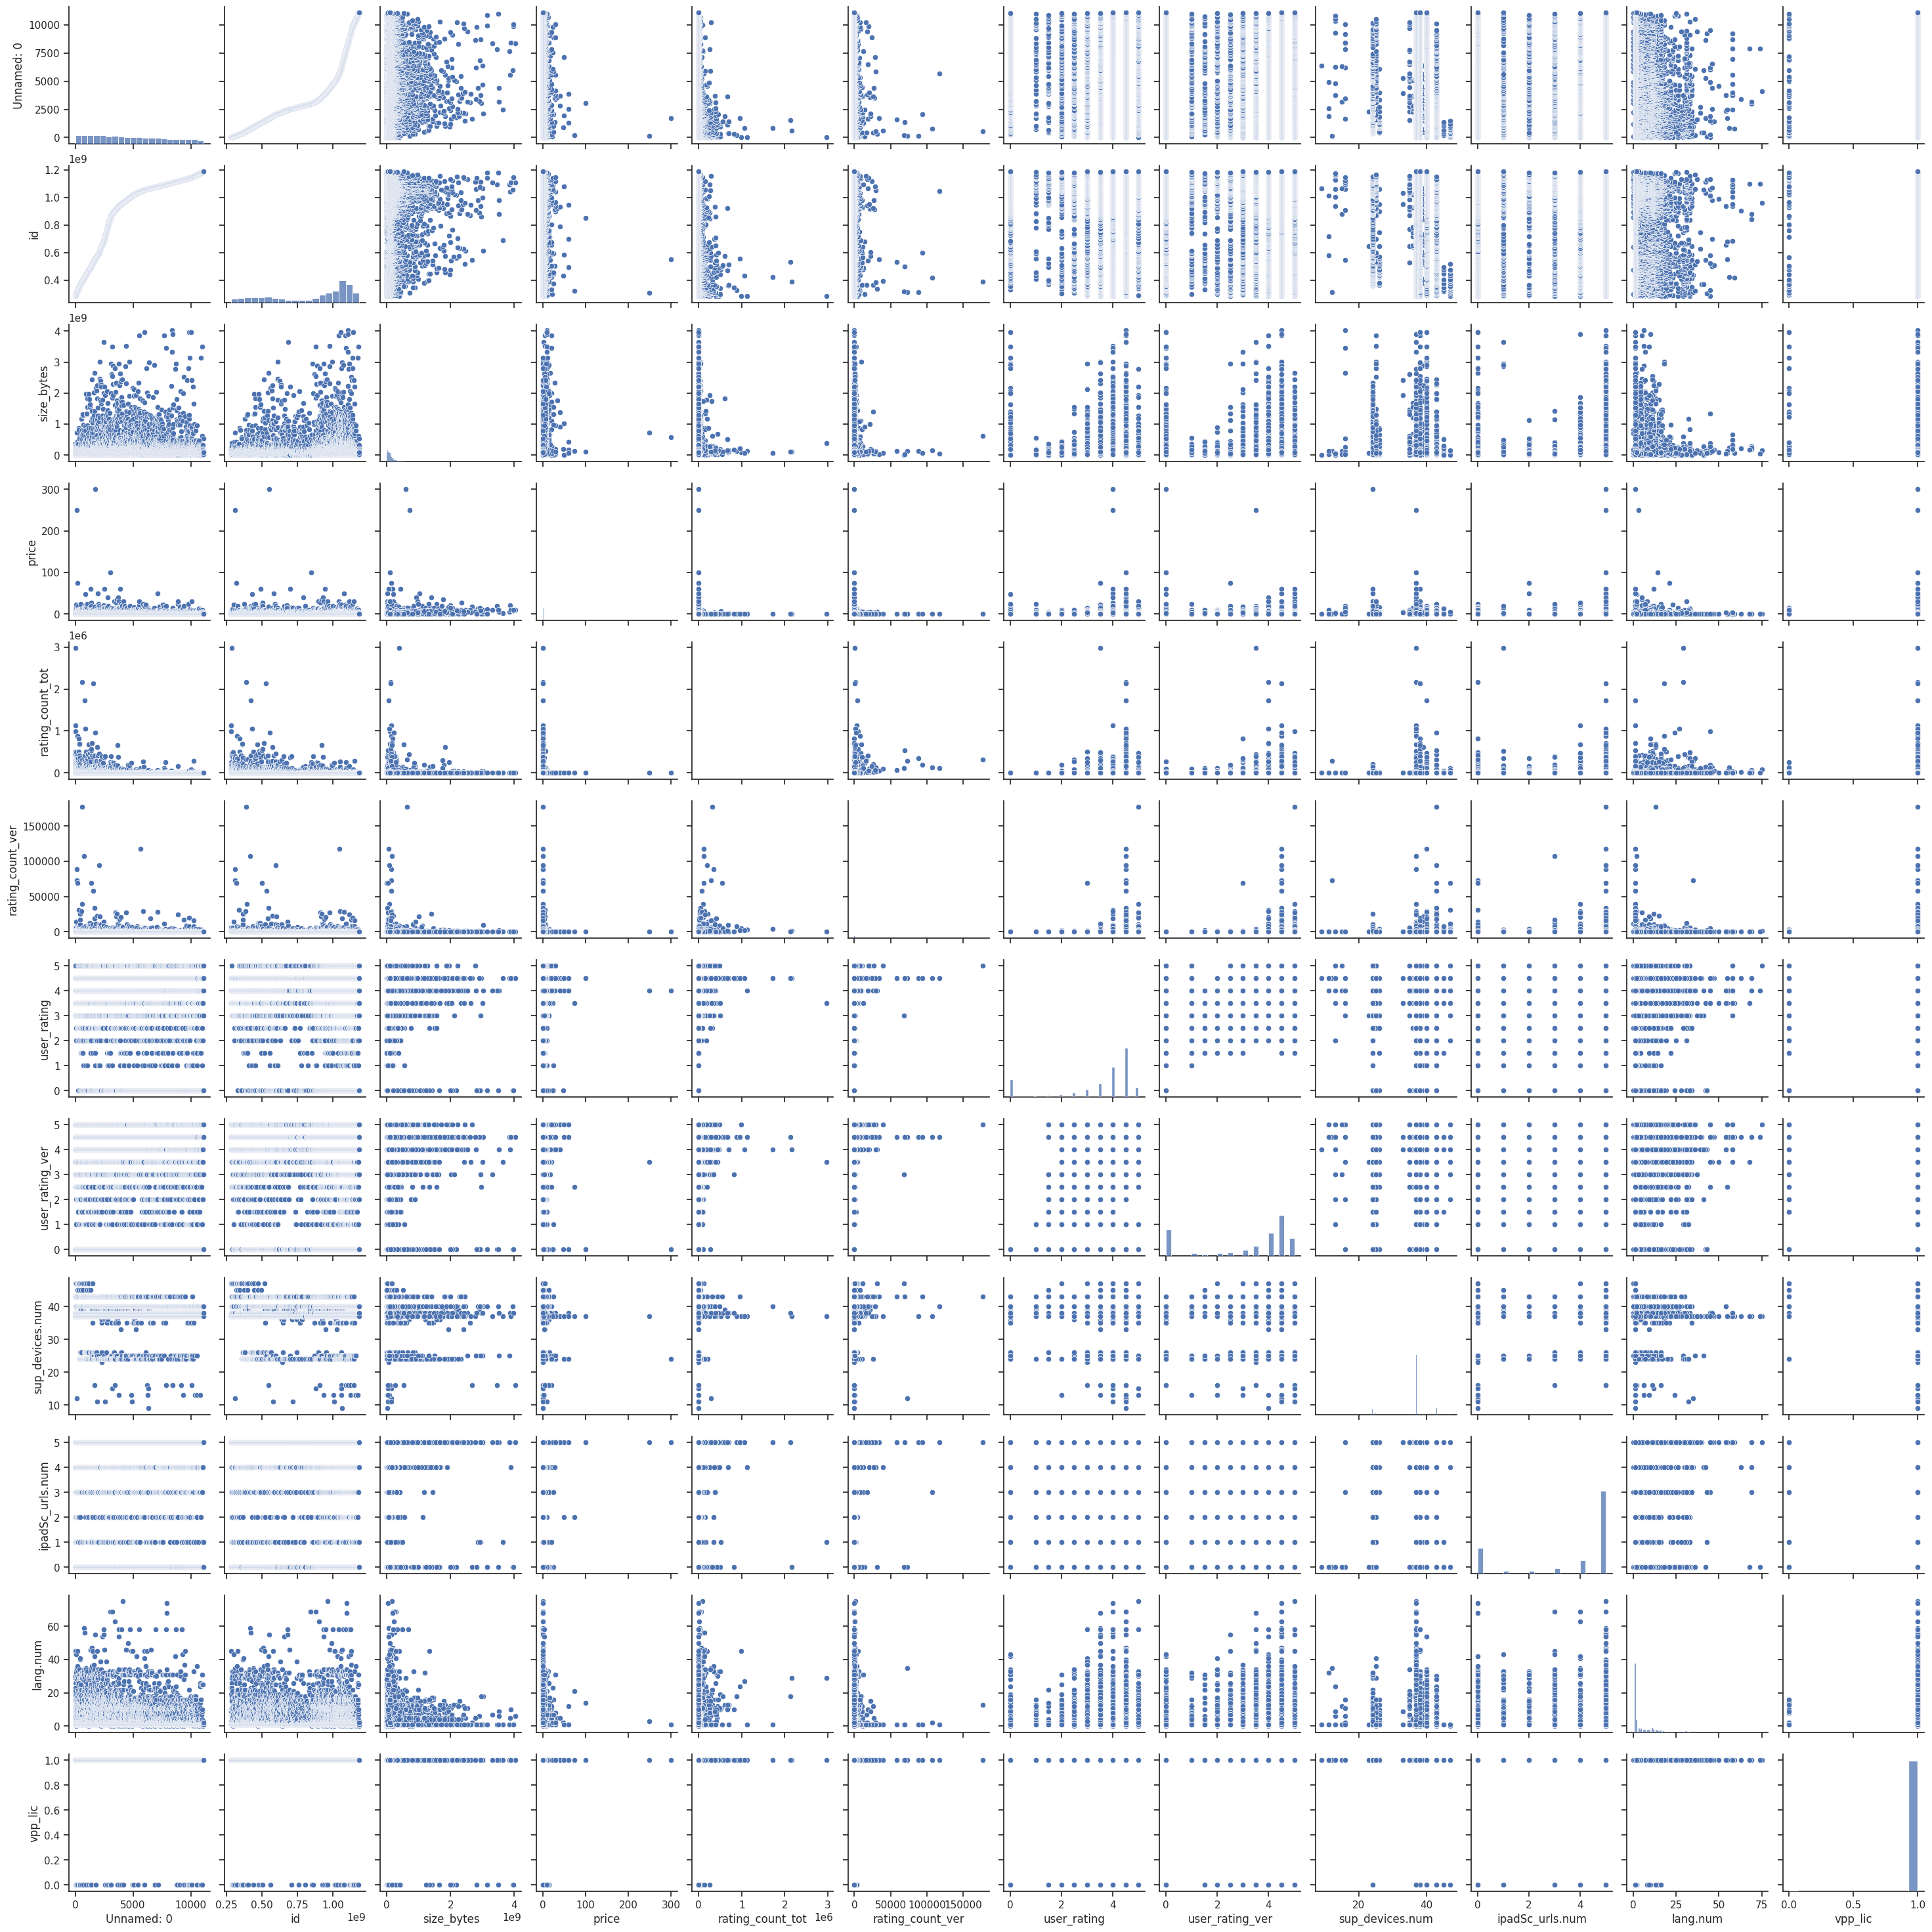

<ipython-input-17-b178b51c575d>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


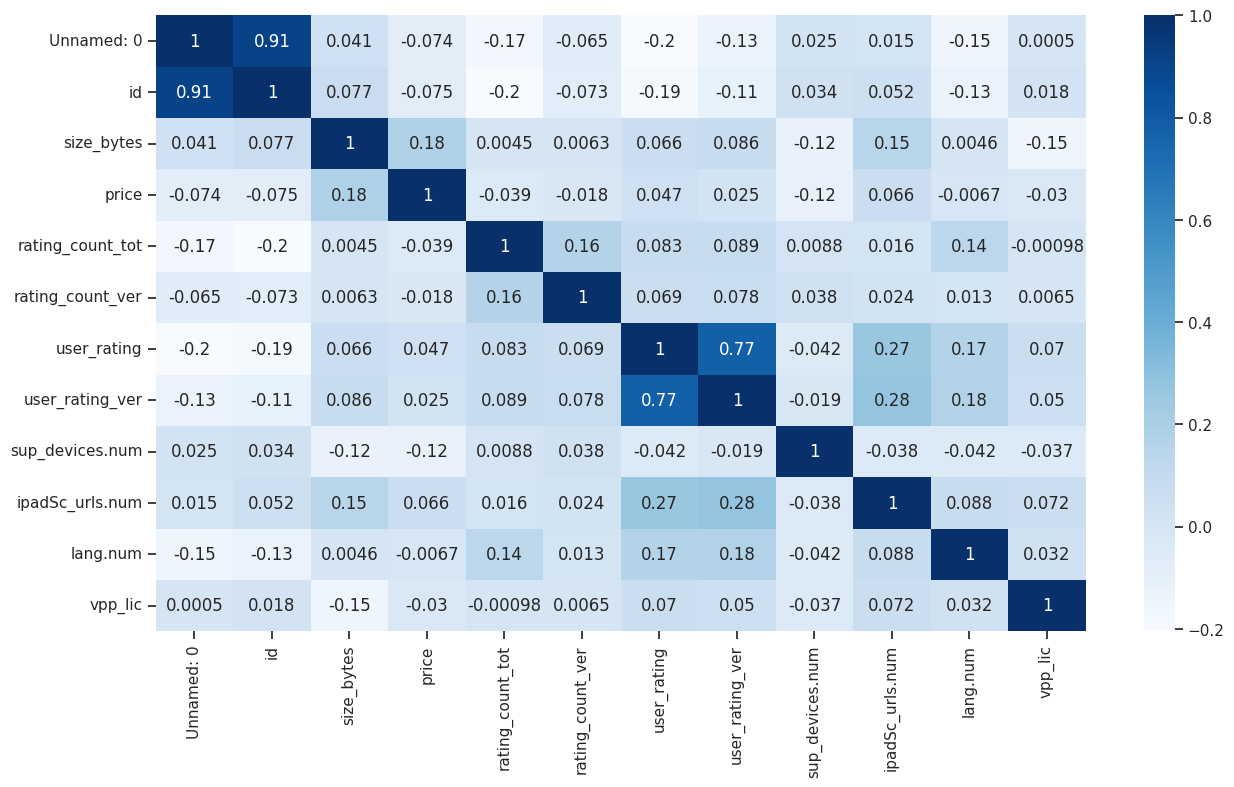

In [ ]:
# Create a pairplot
sns.pairplot(df)
plt.show()

# Create a scatterplot matrix
sns.set(style="ticks")
sns.pairplot(df, kind="scatter")
plt.show()

# Create a correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

In [ ]:
# Extract relevant columns
df = df[['track_name', 'user_rating', 'rating_count_tot', 'price']]

In [ ]:
# Convert user_rating to binary classification (1 for fraudulent apps, 0 for genuine apps)
df['user_rating'] = df['user_rating'].apply(lambda x: 1 if x < 4 else 0)

<ipython-input-19-0d602f1b152a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_rating'] = df['user_rating'].apply(lambda x: 1 if x < 4 else 0)


SPLITTING THE DATA INTO TRAINING AND TESTING PART 
TEST SIZE : 30%
TRAINING: 70%

In [ ]:
# Split the dataset into training and testing sets
X = df.drop('user_rating', axis=1)
y = df['user_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Check if the 'prime_genre' column exists in the DataFrame
if 'prime_genre' in df.columns:
    # Check the target variable for the number of unique classes
    print(df['prime_genre'].value_counts())

    # If there is only one class, remove it from the data
    if len(df['prime_genre'].unique()) == 1:
        df = df.drop(['prime_genre'], axis=1)
        print('Removed the only class from the data.')
else:
    print('Column "prime_genre" does not exist in the DataFrame.')


Column "prime_genre" does not exist in the DataFrame.


In [ ]:
  # Vectorize the track_name column using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['track_name'])
X_test_tfidf = vectorizer.transform(X_test['track_name'])

SELECTING THE MACHIN LEARNING MODEL

SVM - SUPPORT VECTOR MACHINE

In [ ]:
# Train an SVM classifier on the vectorized data
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = svm.predict(X_test_tfidf)

ACCURACY AND CONFUSION MATRIX

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.687037037037037


In [ ]:
# Generate a confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1330  108]
 [ 568  154]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.80      1438
           1       0.59      0.21      0.31       722

    accuracy                           0.69      2160
   macro avg       0.64      0.57      0.56      2160
weighted avg       0.66      0.69      0.64      2160



VISUALIZATION OF CONFUSION MATRIX USING HEAT MAP

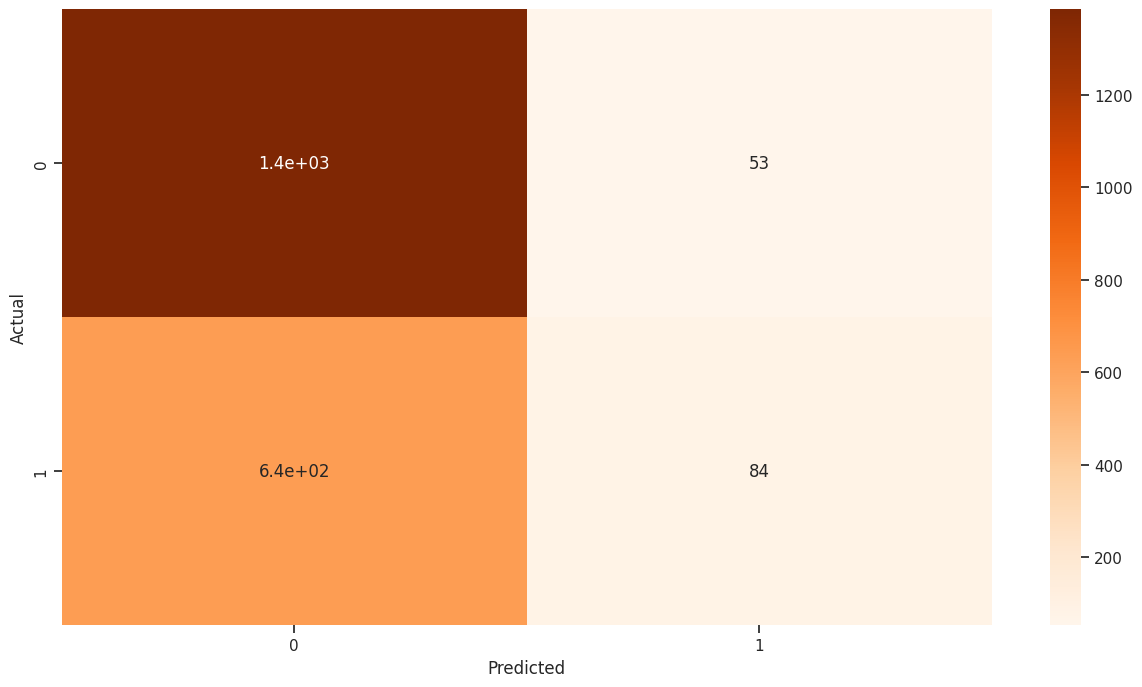

In [ ]:
# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2nd MACHINE LEARNING MODEL LOGISTIC REGRESSION AND CONFUSION MATRIX

Accuracy: 0.6388888888888888
Precision: 0.5056148881363781
Recall: 0.6388888888888888
F1 Score: 0.5226337448559671


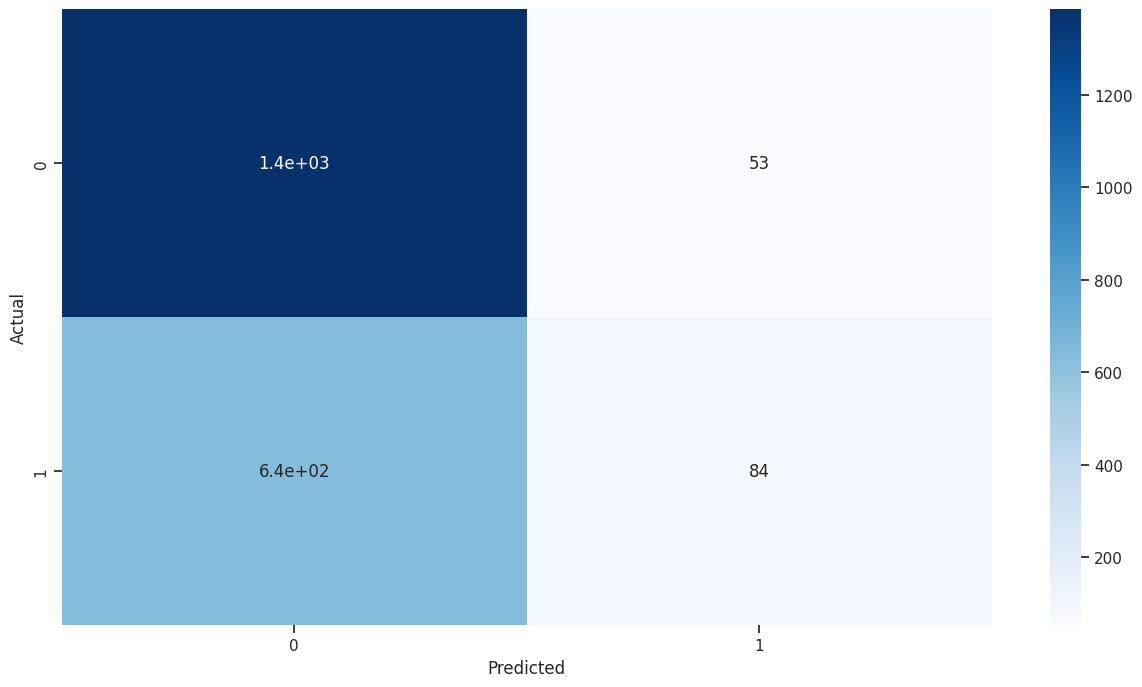

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Create a logistic regression object
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train_tfidf[:5037], y_train[:5037])

# Make predictions on the test data
y_pred = lr.predict(X_test_tfidf[:1440])

# Evaluate the metrics
accuracy = accuracy_score(y_test[:1440], y_pred)
precision = precision_score(y_test[:1440], y_pred, average='weighted')
recall = recall_score(y_test[:1440], y_pred, average='weighted')
f1 = f1_score(y_test[:1440], y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



3rd MACHINE LEARNING MODEL KNeighbors Classifier CONFUSION MATRIX

Accuracy: 0.5847222222222223
Precision: 0.5197602467606409
Recall: 0.5847222222222223
F1 Score: 0.5361039031521677


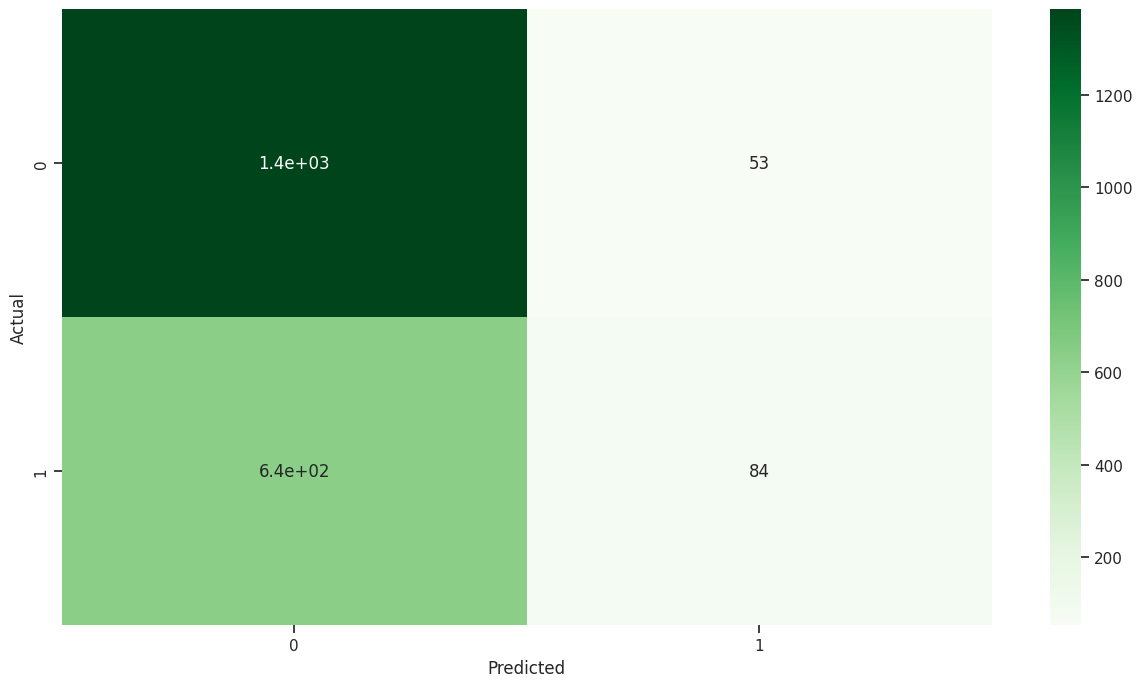

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train_tfidf[:5037], y_train[:5037])

# Make predictions on the test data
y_pred = knn.predict(X_test_tfidf[:1440])

# Evaluate the metrics
accuracy = accuracy_score(y_test[:1440], y_pred)
precision = precision_score(y_test[:1440], y_pred, average='weighted')
recall = recall_score(y_test[:1440], y_pred, average='weighted')
f1 = f1_score(y_test[:1440], y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


4th MACHINE LEARNING MODEL GradientBoosting Classifier CONFUSION MATRIX

Accuracy: 0.7840277777777778
Precision: 0.8259733080628602
Recall: 0.7840277777777778
F1 Score: 0.752916187349473


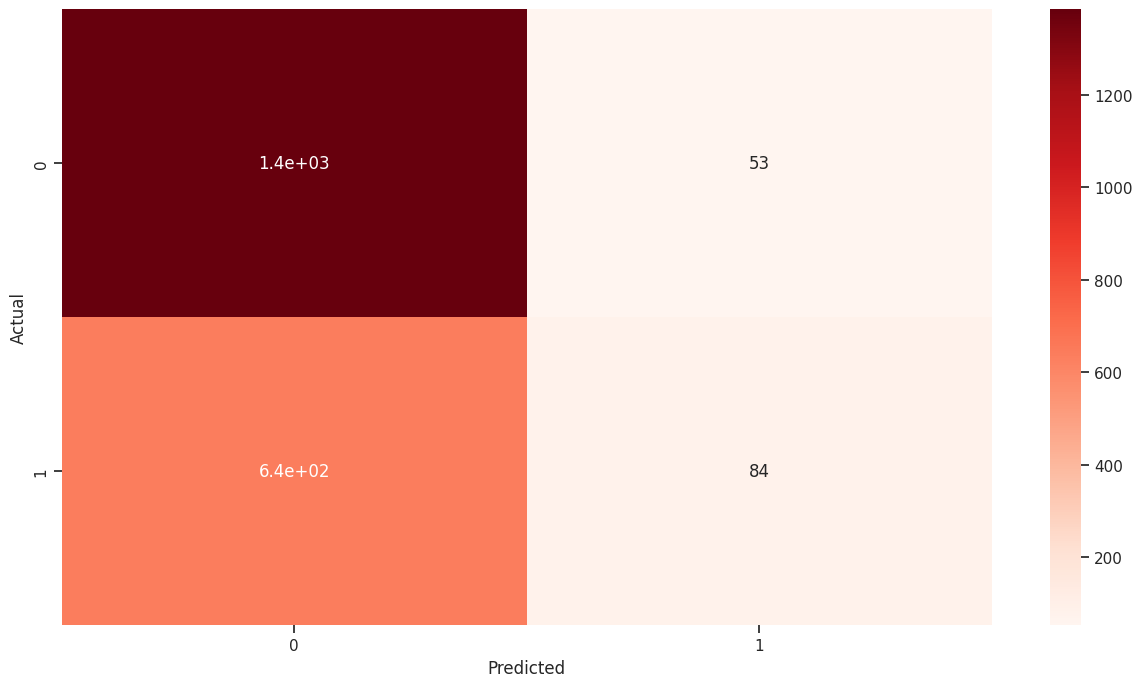

In [ ]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Separate the features (X) and the target variable (y)
X = df[['track_name', 'rating_count_tot', 'price']]
y = df['user_rating']

# Perform label encoding for the 'track_name' column
label_encoder = LabelEncoder()
X['track_name_encoded'] = label_encoder.fit_transform(X['track_name'])
X = X.drop('track_name', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5th MACHINE LEARNING MODEL RANDOM FOREST CLASSIFIER CONFUSION MATRIX

Random Forest Classifier:
Accuracy: 0.6
Precision: 0.5292263152001792
Recall: 0.6
F1 Score: 0.5427070666747208


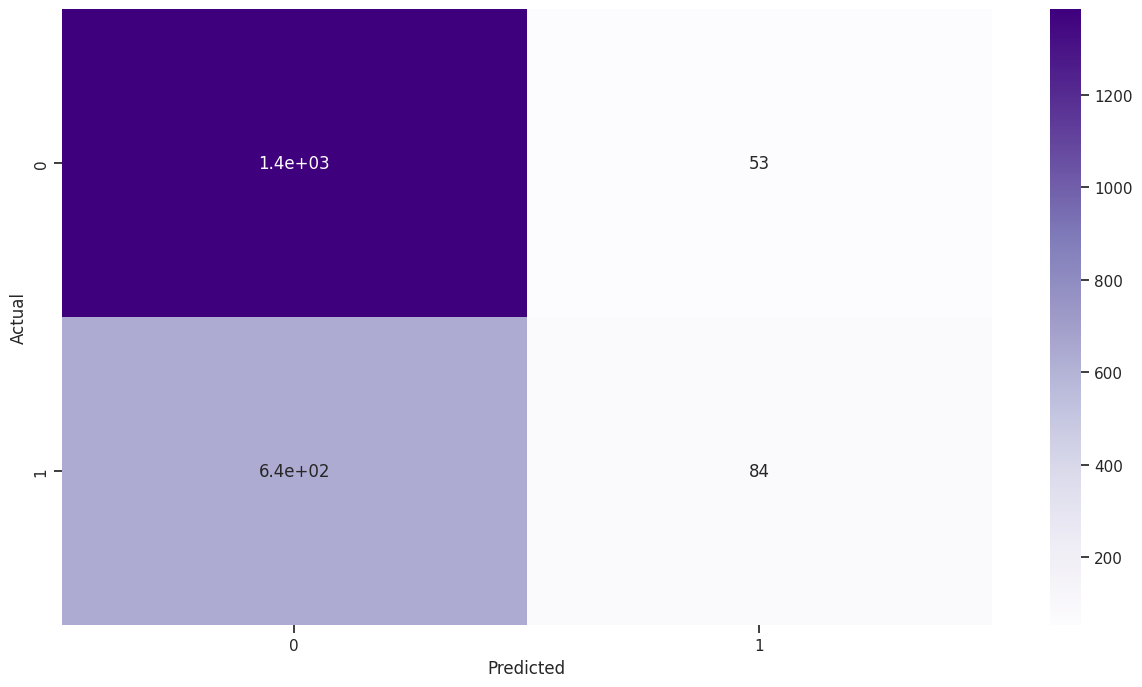

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest Classifier object
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train_tfidf[:5037], y_train[:5037])

# Make predictions on the test data
y_pred = rf.predict(X_test_tfidf[:1440])

# Evaluate the metrics
accuracy_rf = accuracy_score(y_test[:1440], y_pred)
precision_rf = precision_score(y_test[:1440], y_pred, average='weighted')
recall_rf = recall_score(y_test[:1440], y_pred, average='weighted')
f1_rf = f1_score(y_test[:1440], y_pred, average='weighted')
# Print the evaluation metrics for Random Forest
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


6th MACHINE LEARNING MODEL MLP CLASSIFIER CONFUSION MATRIX

Multi-Layer Perceptron (MLP) Classifier:
Accuracy: 0.5354166666666667
Precision: 0.5151059659178235
Recall: 0.5354166666666667
F1 Score: 0.5236548233940258


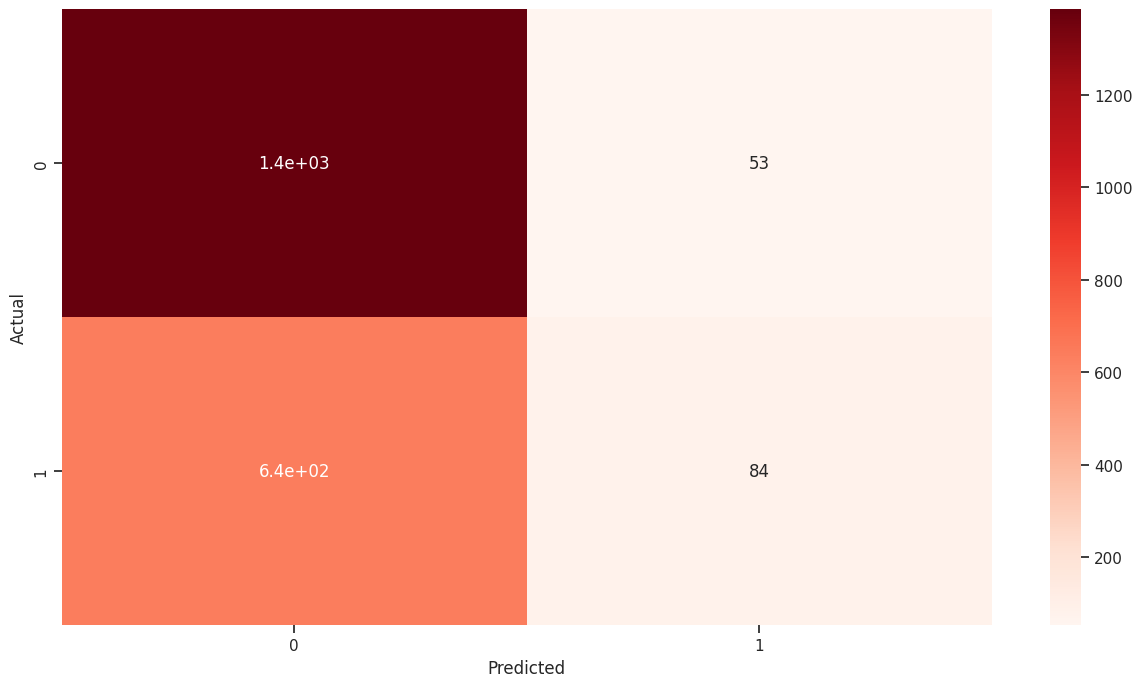

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create an MLP Classifier object
mlp = MLPClassifier()

# Fit the model on the training data
mlp.fit(X_train_tfidf[:5037], y_train[:5037])

# Make predictions on the test data
y_pred_mlp = mlp.predict(X_test_tfidf[:1440])

# Compute the precision, recall, and F1 score
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
accuracy_mlp = accuracy_score(y_test[:1440], y_pred_mlp)

# Print the evaluation metrics for MLP Classifier
print("Multi-Layer Perceptron (MLP) Classifier:")
print(f"Accuracy: {accuracy_mlp}")
print(f"Precision: {precision_mlp}")
print(f"Recall: {recall_mlp}")
print(f"F1 Score: {f1_mlp}")

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()